## 运用smith Waterman 算法实现重复检测的结果展示

### 方法简述
smith waterman 算法是一种序列匹配相似性度量的算法，最早应用于DNA序列比对中。该算法不依赖与领域知识，通过在适当的位置使用间隙，允许不匹配字符的缺失。而且对于字符换拼写错误也有一定的识别能力。

### 数据集
网络中找到的119个常见英文名及其缩写，以及160个常见英文姓。将其完全组合得到长度为19040的英文姓名组合。

### 参数设置
我们将首字母匹配得分设置为2， 非首字母奖励得分为1。空格惩罚设置为0.5，省略惩罚为0.3。
<br>
最终我们将得分高于50的视作为potential duplicate pair.

## 首先我们直接将匹配对进行检测，来计算模型的准确率

### 结果

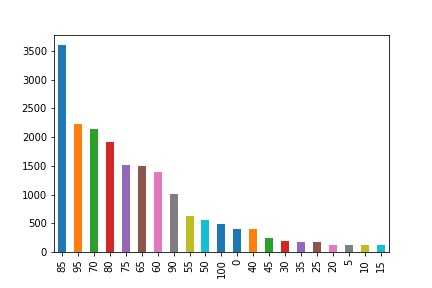

### 结果分析

在19040个示例中，共有2090个元组匹配失败。准确率为89%。

</br>
对于失配的元组我们可以分为以下几类：
+ #### 缩写与全称长度差异太大。
eg. ('Alex. MC', 'Alexander MC'), ('Bart. BENNETT', 'Bartholomew BENNETT'), ('Chr. HUNT', 'Christian HUNT')
+ #### 利用发音进行缩写，字符本身差异过大。
eg. ('Alf. SMITH', 'Alphonse SMITH'), ('Froo. SCOTT', 'Franco SCOTT'), ('Gul. BELL', 'William BELL'), ('Jab CARTER', 'James CARTER') etc.
+ #### 采用首位字符拼接实现简写
eg. ('Hy DAY', 'Henry DAY')

## 进一步地，我们人为地制造一些错误匹配对，来对比该方法是否存在误检的情况

### 结果

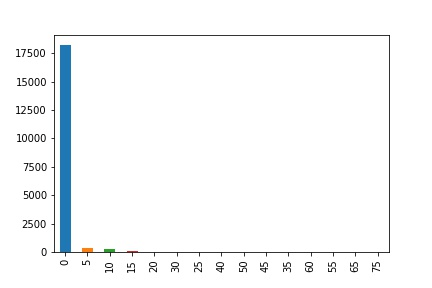

### 结果分析

在19040个示例中，共有9个元组匹配成功。误检率0.047%。

</br>
以下是错误检测的元组序列

('Brid. COLLINS', 'Edward COLLINS'), ('Dy RICHARDS', 'Josiah RICHARDS'), ('Dy PERRY', 'Dorothy PERRY'), ('Fred. SIMPSON', 'Richard SIMPSON'), ('Jac. BROWN', 'Francis BROWN'), ('Jer. WILSON', 'Henry WILSON'), ('Mill. WEBSTER', 'William WEBSTER'), ('Sar. ROBERTSON', 'Richard ROBERTSON'), ('Val. WASHINGTON', 'Joshua WASHINGTON')

### 进一步提升模型精确度的方法
+ 针对一些具体应用的特性，指定不同字符串的权重。例如对于名字和地名来说，越靠前的字符串所含的信息量越大，因此我们可以将某些较重要的字符串的权值提高
+ 调参。本次测试结果没有进行过多调参，更加精细的调参可能会提高模型的健壮性
+ 为模型添加一些先验知识，例如某些特定的缩写方法等